# Forecasting in-demand Jobs in Canada


# 1. Raw data collection and preprocessing

Before running the code below, create the folders 'raw_data' and 'job_description' in the same notebook's directory.
The collecting data process were as follows:
 - Fetch Indeed job pages by querying by keyword 'Canada'.
 - Retrieve basic jobs information (link, title, company, date, summary, etc.) from indeed job pages.
 - Fetch full job pages.
 - Restrieve full job description by job pages fetched.
 

In [1]:
# Installing Dependencies # Beaultifulsoup # Requests # Tqdm # Statsmodel 
#!pip install beautifulsoup4 
#!pip install requests 
#!pip install tqdm 
#!pip install statsmodels  

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import time
from datetime import datetime, timedelta
    
import requests as rq
import bs4 as bs4
from bs4 import BeautifulSoup
from tqdm import tqdm

import glob
import json
import io
import os

import warnings
warnings.filterwarnings("ignore")

### Fetching job pages

In [3]:
# categories = ["Sales, retail, and customer support", 'Technology', 'Organization Operations and administrative',
#           'Finance and accounting', 'Healthcare', 'Architecture and Engineering', 'Food and Beverage',
#           'Supply chain and logistics', 'Construction and Extraction', 'Repair, maintenance and installation',
#           'Manufacturing and utilities', 'Marketing, advertising and public relations', 'transportation',
#           'Cleaning and grounds maintenance', 'Science and research', 'Communitiy and social services', 
#           'Education and institution', 'Safety security and civil defense', 'Media, arts and design', 'personal service',
#           'Travel, attractions and events', 'Legal', 'Farming, fisheries and forestry']

# category_code = ['Zfg6lZX5R2qhV8aw3QoU4g', 'eXAh-UqhTh2uUxY71DdIeQ', 'TX910kdqQ-K_oGQBhQZV7Q', '7nqgkr9CSiKifCjwnZ1kWA', 
#                  '028C4aZsQSuGAYVV_F2C5Q', 'OjYq3LBnTNaW7lQ5EAAauQ', 'D6eJ653vRBmmuy4q5Mn-Mg', 'S2vKNjPeToGdo1XAvd_UBg',
#                  'EYy95Kc-QYWWZL7Fs0OFJg', 'CT5ypZ41ReKDkO2JiKgxAQ', '04gOKIMkSOGGvLC7uK0O8Q', 'QB5NTrCNS2ixO3U5WSBMjg',
#                  't8rEwKhpQQ--5oRPrQRJ-Q', '9zmgMulNQveZo_NoiFiYBQ', 'c1aBi8aaTvGNYT3Jk1Ugqg', 'qq1bOrn0RBeCI1itUNcKsg',
#                 'UckfxgXgRt24ylrM2uTzew', 'ZfOojWBZTYSWUDX8f-i2jQ', 'O4-kSWvfR9aTGSFrwi3CEg', 'fvBtcpn0TOGgdt_-yLWl2w', 
#                 'YMUWAcgrQbyX17SmdLkwZw', 'pYAAXKODTF2TcoFQF7uiqA', 'gyjaWyYUSESc0BH5FQh8hQ' ]


# category_dict = dict(zip(categories, category_code))


    
# url = "https://ca.indeed.com/jobs?q=Canada&fromage=8&lang=en&taxo1={category_code}&start={page}"

# pages_number = []
# for i in range(10, 1500, 10):
#     pages_number.append(i)

# for category in categories:
#     print(category)
#     category_code =  category_dict[category]
#     for page in tqdm(pages_number):
        
#         urll = url.format(category_code=category_code, page=page)
#         response = rq.get(urll)
        
#         with io.open("raw_data_2/{}_{}.html".format(category, page), "w", encoding="utf-8") as f:
#             f.write(response.text)

### Reading jobs from job pages

In [4]:
# categories = ["Sales, retail, and custumer support", 'Technology', 'Organization Operations and administrative',
#           'Finance and accounting', 'Healthcare', 'Architecture and Engineering', 'Food and Beverage',
#           'Supply chain and logistics', 'Construction and Extraction', 'Repair, maintenance and installation',
#           'Manufacturing and utilities', 'Marketing, advertising and public relations', 'transportation',
#           'Cleaning and grounds maintenance', 'Science and research', 'Communitiy and social services', 
#           'Education and institution', 'Safety security and civil defense', 'Media, arts and design', 'personal service',
#           'Travel, attractions and events', 'Legal', 'Farming, fisheries and forestry']

# i = 0

# pages_number = []
# for i in range(10, 1500, 10):
#     pages_number.append(i)
    
# with open("parsed_job_posts_2.json", 'w+') as output:
#     for category in tqdm(categories):
#         for page in pages_number:       
#             page = "raw_data_2/{}_{}.html".format(category, page)

#             with io.open(page, "r", encoding="utf-8") as inp:
#                 page_html = inp.read()
#                 soup = bs4.BeautifulSoup(page_html, 'html.parser')

#                 class_watch = soup.find_all(attrs={"class":re.compile(r"jobsearch-SerpJobCard unifiedRow")})
#                 for e in class_watch:

#                         data = dict()

#                         test_pl = e.find_all(attrs={"data-tn-element":re.compile(r"jobTitle")})
#                         if test_pl:
#                             post_link = test_pl[0]['id']
#                         else:
#                             post_link = np.nan   
#                         data['link'] = post_link

#                         test_jt = e.find_all(attrs={"data-tn-element":re.compile(r"jobTitle")})
#                         if test_jt:
#                             job_title = test_jt[0].text.strip()
#                         else:
#                             job_title = np.nan   
#                         data['job_title'] = job_title

#                         test_cn_1 = e.find_all(attrs={"data-tn-element":re.compile(r"companyName")})
#                         test_cn_2 = e.find_all(attrs={"class":re.compile(r"company")})
#                         if test_cn_1:
#                             company_name = test_cn_1[0].text.strip()
#                         elif test_cn_2:
#                             company_name = test_cn_2[0].text.strip()
#                         else:
#                             company_name = np.nan       
#                         data['company_name'] = company_name                    

#                         test_location = e.find_all(attrs={"class":re.compile(r"location accessible-contrast-color-location")})
#                         if test_location:
#                             location = test_location[0].text.strip()
#                         else:
#                             location = np.nan   
#                         data['location'] = location

#                         test_sal = e.find_all(attrs={"class":re.compile(r"salaryText")})
#                         if test_sal:
#                             salary = test_sal[0].text.strip()
#                         else:
#                             salary = np.nan   
#                         data['salary'] = salary

#                         test_cs = e.find_all(attrs={"data-tn-variant":re.compile(r"cmplinktst2")})
#                         if test_cs:
#                             company_star = test_cs[0].text.strip()
#                         else:
#                             company_star = np.nan    
#                         data['company_star'] = company_star

#                         test_dp = e.find_all(attrs={"class":re.compile(r"date date-a11y")})
#                         if test_dp:
#                             day_published = test_dp[0].text.strip()
#                         else:
#                             day_published = np.nan    
#                         data['day_published'] = day_published

#                         data['category'] = category

#                         test_js = e.find_all(attrs={"class":re.compile(r"summary")})
#                         if test_js:
#                             job_summary = test_js[0].text.strip()
#                         else:
#                             job_summary = np.nan
#                         data['job_summ'] = job_summary

                        

#                         output.write("{}\n".format(json.dumps(data)))

In [5]:
# # Data verification
# df = pd.read_json("parsed_job_posts.json", lines=True)
# df.head()

### Fecthing full job pages

In [6]:
# url = "https://ca.indeed.com/viewjob?jk={link}"

# for link in tqdm(df['link']):
#     link = link[3:]
#     urll = url.format(link=link)
#     response = rq.get(urll)
        
#     with io.open("job_description/{}.html".format(link), "w", encoding="utf-8") as f:
#         f.write(response.text)

### Reading full job description from job pages

In [7]:
# with open("parsed_job_descriptions.json", 'w+') as output:
#     for link in tqdm(df['link']):
#         link_name = link[3:]      
#         page = "job_description/{}.html".format(link_name)
    
#         with io.open(page, "r", encoding="utf-8") as inp:
#             page_html = inp.read()
#             soup = bs4.BeautifulSoup(page_html, 'html.parser')
                
#             data = dict()
#             test_jd = soup.find_all(attrs={"class":re.compile(r"obsearch-jobDescriptionText")})
#             if test_jd:
#                 job_description = test_jd[0].text.strip()
#             else:
#                 job_description = np.nan 
                
#             data['job_description'] = job_description
            
#             output.write("{}\n".format(json.dumps(data)))

In [8]:
# # Data verification
# df_descr = pd.read_json("parsed_job_descriptions.json", lines=True)
# df_descr

In [9]:
# df_final = pd.concat([df, df_descr], axis=1)
# df_final.head()

In [10]:
# # Saving the final dataset
# df_final.to_csv('indeed_job_posts.csv', index=False)

# 2. Exploratory Data Analysis

The previous dataset was saved and loaded into the project GiHub repositoray so that it can be loaded from there.

In [11]:
# loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/madserrano/advance_py/main/indeed_job_posts.csv')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13555 entries, 0 to 13554
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   link           13555 non-null  object 
 1   job_title      13555 non-null  object 
 2   company_name   13555 non-null  object 
 3   location       13555 non-null  object 
 4   salary         4178 non-null   object 
 5   company_star   9344 non-null   float64
 6   day_published  13555 non-null  object 
 7   job_summ       13555 non-null  object 
 8   category       13555 non-null  object 
 9   days_elapsed   13555 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 1.0+ MB


In [12]:
# Printing dataset
df.sample()

,link,job_title,company_name,location,salary,company_star,day_published,job_summ,category,days_elapsed
11864,jl_7f7e58d1a6bb0ef7,HSE Advisor,Canlin Energy Corporation,"Cochrane, AB",NaN,NaN,1 day ago,Reporting directly to the Health and Safety Ma...,Safety security and civil defense,1


In [13]:
df['location'].nunique()/df.shape[0]

0.06757654002213205

In [14]:
# There are null values on some of the columns 
# But we may not need everything, so let's extract only those we need for analysis
# df1 = df[['job_title', 'location', 'category', 'days_elapsed']]
# df1.head(2)

In [15]:
# Print the count of unique job titles
uniq_jobs = df['job_title'].nunique()
uniq_jobcat = df['category'].nunique()

print("Unique Job title count", uniq_jobs)
print("Unique Job category count", uniq_jobcat)

Unique Job title count 11188
Unique Job category count 23


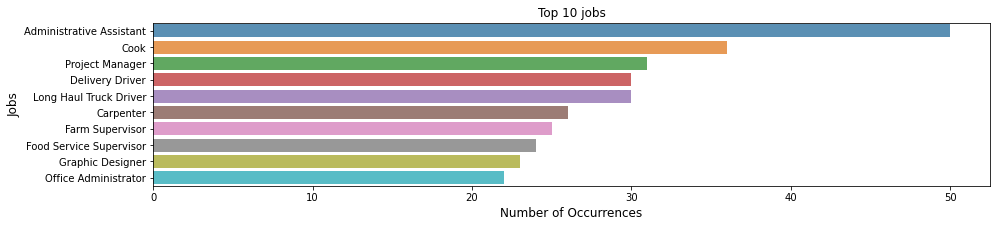

In [16]:
# Plotting a bar graph of the top-10 jobs 
job_count  = df['job_title'].value_counts()
job_count = job_count[:10]
plt.figure(figsize=(15,3))

sns.barplot(job_count.values, job_count.index, alpha=0.8)
plt.title('Top 10 jobs')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Jobs', fontsize=12)
plt.show()

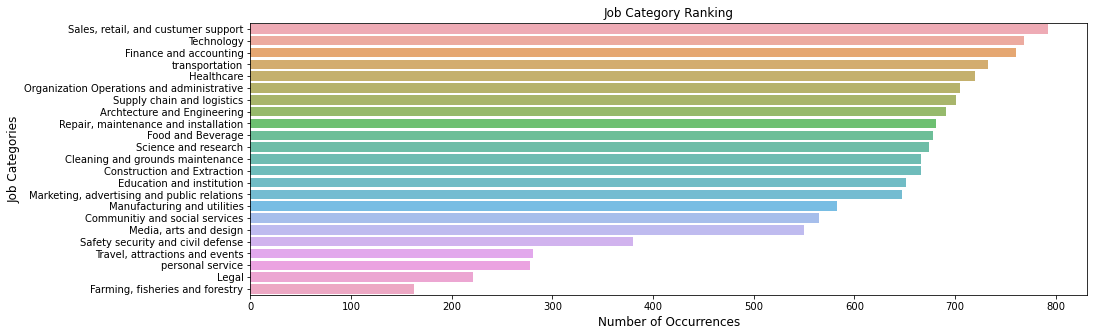

In [17]:
# Plotting the ranking of job categories
job_cat  = df['category'].value_counts()
plt.figure(figsize=(15,5))

sns.barplot(job_cat.values, job_cat.index, alpha=0.8)
plt.title('Job Category Ranking')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Job Categories', fontsize=12)
plt.show()

As we are dealing with a dataseries dataset, we will create a new column with datetime object.
As the number datapoints by job type is to low, we will consider plotting the data by category.

In [18]:
# Printing dataset before transformation
df.head(2)

,link,job_title,company_name,location,salary,company_star,day_published,job_summ,category,days_elapsed
0,jl_a4b5cdd5e3bb20b2,"Customer Representative - Mission City, BC (11...",Scotiabank,"Mission, BC",NaN,3.9,1 day ago,Join the Global Community of Scotiabankers to ...,"Sales, retail, and custumer support",1
1,jl_1d8e943d283178b0,Customer Service Representative,Waste Connections,"Brantford, ON",NaN,3.0,Just posted,Your primary goal will be to try to achieve fi...,"Sales, retail, and custumer support",0


In [19]:
# function to transform day elapsed into a pandas datetime object
def time_transf(day_elapsed):
    # The day in this transformation is being processed in 27 Mar 2021
    today_date = pd.to_datetime('26 Mar 2021', format="%d %b %Y")
    day = today_date - timedelta(days=day_elapsed)
    return day

df['date'] = df['days_elapsed'].apply(lambda x: time_transf(x))
df.head()

,link,job_title,company_name,location,salary,company_star,day_published,job_summ,category,days_elapsed,date
0,jl_a4b5cdd5e3bb20b2,"Customer Representative - Mission City, BC (11...",Scotiabank,"Mission, BC",NaN,3.9,1 day ago,Join the Global Community of Scotiabankers to ...,"Sales, retail, and custumer support",1,2021-03-25
1,jl_1d8e943d283178b0,Customer Service Representative,Waste Connections,"Brantford, ON",NaN,3.0,Just posted,Your primary goal will be to try to achieve fi...,"Sales, retail, and custumer support",0,2021-03-26
2,jl_35e0e8e92399a4ee,"NAM Canada Sales & Trading Summer Analyst, Tor...",Citi,"Toronto, ON",NaN,3.9,3 days ago,"In Sales and Trading, we advise our institutio...","Sales, retail, and custumer support",3,2021-03-23
3,jl_5d1bef3f6ba1b016,Customer Care Representative - Ontario,MSC (Mediterranean Shipping Company),"Mississauga, ON",NaN,4.0,11 days ago,The Customer Care Representative’s primary res...,"Sales, retail, and custumer support",11,2021-03-15
4,jl_a4a53f2e79c8c8a2,Grocery Clerk,Loblaw Companies Limited,"Grimsby, ON",NaN,3.5,7 days ago,"As a colleague in one of our stores, you will ...","Sales, retail, and custumer support",7,2021-03-19


In [20]:
# "df_time" dataset has only the features necessary for data visualization
df_time = df[['job_title', 'location', 'category', 'days_elapsed', 'date']]
df_time

,job_title,location,category,days_elapsed,date
0,"Customer Representative - Mission City, BC (11...","Mission, BC","Sales, retail, and custumer support",1,2021-03-25
1,Customer Service Representative,"Brantford, ON","Sales, retail, and custumer support",0,2021-03-26
2,"NAM Canada Sales & Trading Summer Analyst, Tor...","Toronto, ON","Sales, retail, and custumer support",3,2021-03-23
3,Customer Care Representative - Ontario,"Mississauga, ON","Sales, retail, and custumer support",11,2021-03-15
4,Grocery Clerk,"Grimsby, ON","Sales, retail, and custumer support",7,2021-03-19
...,...,...,...,...,...
13550,Urban Farmer,"Halifax, NS","Farming, fisheries and forestry",3,2021-03-23
13551,Irrigation Technician,"Niagara-on-the-Lake, ON","Farming, fisheries and forestry",3,2021-03-23
13552,Irrigation Specialist,"Niagara-on-the-Lake, ON","Farming, fisheries and forestry",3,2021-03-23
13553,Hatchery Manager,"Port Williams, NS","Farming, fisheries and forestry",28,2021-02-26


In [21]:
# Prints the unique cities
df_time['location'].unique()

array(['Mission, BC', 'Brantford, ON', 'Toronto, ON', 'Mississauga, ON',
       'Grimsby, ON', 'Vaughan, ON', 'Ottawa, ON', 'Pitt Meadows, BC',
       'Lower Sackville, NS', 'Revelstoke, BC', 'Sainte-Marie, QC',
       'Vancouver, BC', 'Newmarket, ON', 'St. Thomas, ON', 'Richmond, BC',
       'Stouffville, ON', 'Kingston, ON', 'Abbotsford, BC',
       'Rocky Mountain House, AB', 'Simcoe, ON', 'Orangeville, ON',
       'Fort St. John, BC', 'Weyburn, SK', 'Brampton, ON',
       'Belleville, ON', 'Penetanguishene, ON', 'Duncan, BC',
       'Iqaluit, NU', 'Pointe-Claire, QC', 'Swift Current, SK',
       'Peterborough, ON', 'Whitehorse, YT', 'Montréal, QC',
       'Quebec City, QC', 'Pickering, ON', 'Oshawa, ON', 'Goffs, NS',
       'Tsawwassen, BC', 'Castlegar, BC', 'Cambridge, ON', 'Surrey, BC',
       'Windsor, ON', 'Deer Lake, NL', 'Canada', 'Hamilton, ON',
       'Truro, NS', 'Etobicoke, ON', 'Concord, ON', 'Remote',
       'Calgary, AB', 'Ajax, ON', 'Niagara Falls, ON', 'Halifax, NS',

In [22]:
# Creating a funtion to help convert "City (Province)" location column
# into two separated columns, 'city' and 'province'.
def split_func(text):
    text = text
    split_text = text.split(',')
    city = split_text[0]
    if len(split_text) == 2:
        province = split_text[1][-2:]
    else:
        province = np.nan
    return city, province

df_time['province'] = df_time['location'].apply(lambda x: split_func(x)[1])
df_time['city'] = df_time['location'].apply(lambda x: split_func(x)[0])
df_time['province'].unique()

array(['BC', 'ON', 'NS', 'QC', 'AB', 'SK', 'NU', 'YT', 'NL', nan, 'NB',
       'MB', 'NT', 'PE'], dtype=object)

In [23]:
df_nan = df_time[df_time.isna().any(axis=1)]
index_nan = df_nan.index.tolist()
df_nan['city'].unique()

array(['Canada', 'Remote', 'British Columbia', 'Ontario', 'Nova Scotia',
       'Alberta', 'Newfoundland and Labrador', 'Manitoba', 'Victoria',
       'New Brunswick', 'Northwest Territories', 'Nunavut',
       'Saskatchewan', 'Quebec Province', 'Sudbury'], dtype=object)

In [24]:
# Converting full province names into province codes
mapping = {'British Columbia':'BC', 'Ontario':'ON', 'Nova Scotia':'NS',
       'Alberta':'AB', 'Newfoundland and Labrador':'NL', 'Manitoba':'MB',
           'Victoria':'BC', 'New Brunswick':'NB', 'Northwest Territories':'NT', 
           'Nunavut':'NU', 'Saskatchewan':'SK', 'Quebec Province':'QC', 'Sudbury':'ON',
          'Canada':'Canada', 'Remote':'Canada'}
def get_code(text):
    
    if text in mapping:
        code = mapping[text]
    
    return code

for i in index_nan:
    text = df_time['city'].iloc[i]
    df_time['province'].iloc[i] = get_code(text)

df_time

,job_title,location,category,days_elapsed,date,province,city
0,"Customer Representative - Mission City, BC (11...","Mission, BC","Sales, retail, and custumer support",1,2021-03-25,BC,Mission
1,Customer Service Representative,"Brantford, ON","Sales, retail, and custumer support",0,2021-03-26,ON,Brantford
2,"NAM Canada Sales & Trading Summer Analyst, Tor...","Toronto, ON","Sales, retail, and custumer support",3,2021-03-23,ON,Toronto
3,Customer Care Representative - Ontario,"Mississauga, ON","Sales, retail, and custumer support",11,2021-03-15,ON,Mississauga
4,Grocery Clerk,"Grimsby, ON","Sales, retail, and custumer support",7,2021-03-19,ON,Grimsby
...,...,...,...,...,...,...,...
13550,Urban Farmer,"Halifax, NS","Farming, fisheries and forestry",3,2021-03-23,NS,Halifax
13551,Irrigation Technician,"Niagara-on-the-Lake, ON","Farming, fisheries and forestry",3,2021-03-23,ON,Niagara-on-the-Lake
13552,Irrigation Specialist,"Niagara-on-the-Lake, ON","Farming, fisheries and forestry",3,2021-03-23,ON,Niagara-on-the-Lake
13553,Hatchery Manager,"Port Williams, NS","Farming, fisheries and forestry",28,2021-02-26,NS,Port Williams


In [25]:
print(df_time['province'].nunique())
print(df_time['province'].unique())

14
['BC' 'ON' 'NS' 'QC' 'AB' 'SK' 'NU' 'YT' 'NL' 'Canada' 'NB' 'MB' 'NT' 'PE']


In [26]:
df_province = df_time

# Add a column that prints the count of each job_title
df_province['cat_count'] = df_province['category'].apply(lambda x: (df_province['category'] == x).sum())
df_province.head()

,job_title,location,category,days_elapsed,date,province,city,cat_count
0,"Customer Representative - Mission City, BC (11...","Mission, BC","Sales, retail, and custumer support",1,2021-03-25,BC,Mission,792
1,Customer Service Representative,"Brantford, ON","Sales, retail, and custumer support",0,2021-03-26,ON,Brantford,792
2,"NAM Canada Sales & Trading Summer Analyst, Tor...","Toronto, ON","Sales, retail, and custumer support",3,2021-03-23,ON,Toronto,792
3,Customer Care Representative - Ontario,"Mississauga, ON","Sales, retail, and custumer support",11,2021-03-15,ON,Mississauga,792
4,Grocery Clerk,"Grimsby, ON","Sales, retail, and custumer support",7,2021-03-19,ON,Grimsby,792


### Plotting graph for job categories per province

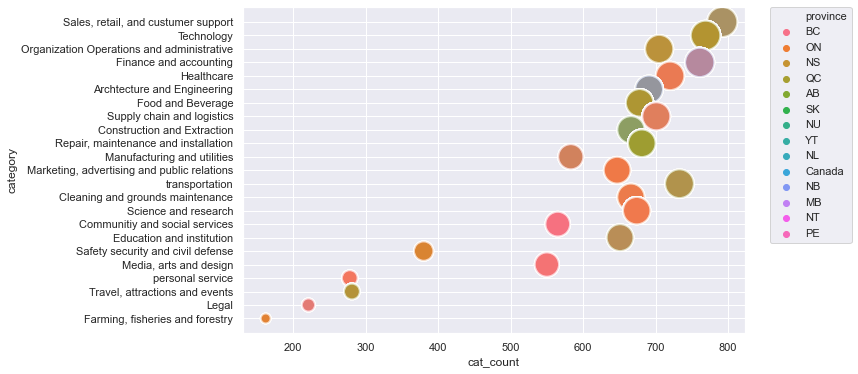

In [27]:
plt.figure(figsize=(9,6))
sns.set_context("paper", font_scale=1.0)
sns.set_theme()
g = sns.scatterplot(x="cat_count", y="category", size="cat_count", sizes=(100,900), hue="province", alpha=0.5, 
                    data=df_province)

# Put the legend out of the figure
h,l = g.get_legend_handles_labels()
plt.legend(h[0:15],l[0:15],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=11)

### Manipulating the dataset by setting the dates as the index. 

The dataset will contain the dates as the index, and the columns will be the count of publications per day by each category.

Indeed only provides detailed date job posts up to 29 days. Any job posted after 29 days is summed up and described as '30+'. As they may impose inaccuracy and cause errors in the analysis, we considered removing dates beyond 30 days.

In [28]:
# Categories analyzed
categories = ["Sales, retail, and custumer support", 'Technology', 'Organization Operations and administrative',
          'Finance and accounting', 'Healthcare', 'Archtecture and Engineering', 'Food and Beverage',
          'Supply chain and logistics', 'Construction and Extraction', 'Repair, maintenance and installation',
          'Manufacturing and utilities', 'Marketing, advertising and public relations', 'transportation',
          'Cleaning and grounds maintenance', 'Science and research', 'Communitiy and social services', 
          'Education and institution', 'Safety security and civil defense', 'Media, arts and design', 'personal service',
          'Travel, attractions and events', 'Legal', 'Farming, fisheries and forestry']

# Creating a dataset with dates as index
minimum = df_time['date'].min()
maximum = df_time['date'].max()
df_dates = pd.DataFrame(pd.date_range(start=minimum, end=maximum), columns=['date'])


df_pub_count = []

dictionary = dict()

# looping over all categories
for category in categories:
    date_list = []
    # Filtering by category and by date below 30 days 
    df_temp = df_time[(df_time['category']==category) & (df_time['days_elapsed']<30)]
    df_temp = pd.DataFrame(df_temp['date'].value_counts()) # count the number of publications
    df_temp.reset_index(inplace=True)
    df_temp.rename(columns={'index':'date', 'date':'pub_count'}, inplace=True)
    df_temp.sort_values(by='date', inplace=True)
    
    # Looping over dates
    for date in df_dates['date']:
#         Filter the dataframe by date
        df_temp_ = df_temp[df_temp['date']==date]
        if len(df_temp_)==1:
            date_list.append(df_temp_['pub_count'].iloc[0])
        else:
            date_list.append(0)
    dictionary[category] = date_list

In [29]:
# Final dataset
df_pub_day = pd.concat([df_dates, pd.DataFrame(dictionary)], axis=1)
df_pub_day.head(10)

,date,"Sales, retail, and custumer support",Technology,Organization Operations and administrative,Finance and accounting,Healthcare,Archtecture and Engineering,Food and Beverage,Supply chain and logistics,Construction and Extraction,...,Cleaning and grounds maintenance,Science and research,Communitiy and social services,Education and institution,Safety security and civil defense,"Media, arts and design",personal service,"Travel, attractions and events",Legal,"Farming, fisheries and forestry"
0,2021-02-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-25,5,3,10,4,8,12,13,12,0,...,1,3,2,4,5,0,1,1,0,0
2,2021-02-26,1,2,0,1,6,1,1,2,0,...,2,3,1,5,0,4,1,1,0,1
3,2021-02-27,0,2,1,3,1,1,2,1,27,...,14,24,26,15,10,11,7,9,7,10
4,2021-02-28,7,14,11,13,21,22,15,21,24,...,18,31,11,21,6,25,8,5,9,7
5,2021-03-01,9,18,11,14,17,11,13,23,22,...,20,21,13,18,7,13,9,5,5,5
6,2021-03-02,7,13,6,17,15,15,17,20,19,...,14,21,15,24,9,16,2,6,10,5
7,2021-03-03,15,14,13,11,19,24,18,15,13,...,23,18,14,23,16,17,10,6,9,5
8,2021-03-04,11,14,15,7,15,18,30,11,1,...,9,1,0,3,1,4,4,0,0,0
9,2021-03-05,1,1,1,1,3,3,3,1,2,...,5,2,2,2,0,6,3,1,1,1


### Plotting a Seaborn heatmap

In [30]:
# Removes the index and takes the transposed matrix, making the dates as columns and
# the categories as the index
index_list = df_pub_day['date'].values.astype(str).tolist()
index = []
for date in index_list:
    index.append(date[:10])

df_heat = df_pub_day.T.copy()
df_heat.columns = index
df_heat.drop(['date'], inplace=True)
df_heat

,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,2021-03-03,2021-03-04,2021-03-05,...,2021-03-17,2021-03-18,2021-03-19,2021-03-20,2021-03-21,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26
"Sales, retail, and custumer support",0,5,1,0,7,9,7,15,11,1,...,37,26,9,9,58,79,97,88,88,24
Technology,0,3,2,2,14,18,13,14,14,1,...,33,35,4,27,53,55,66,68,77,6
Organization Operations and administrative,0,10,0,1,11,11,6,13,15,1,...,45,33,3,7,42,60,80,68,80,8
Finance and accounting,0,4,1,3,13,14,17,11,7,1,...,41,43,2,6,60,67,74,74,75,3
Healthcare,0,8,6,1,21,17,15,19,15,3,...,45,26,2,4,50,65,57,75,58,10
Archtecture and Engineering,0,12,1,1,22,11,15,24,18,3,...,52,25,1,5,40,32,40,36,49,9
Food and Beverage,0,13,1,2,15,13,17,18,30,3,...,22,22,3,9,40,52,35,41,50,8
Supply chain and logistics,0,12,2,1,21,23,20,15,11,1,...,41,42,6,5,39,42,38,32,46,14
Construction and Extraction,0,0,0,27,24,22,19,13,1,2,...,43,2,0,20,40,29,29,34,5,3
"Repair, maintenance and installation",0,2,1,19,12,13,12,16,3,0,...,34,12,4,42,46,51,49,42,13,9


In [31]:
# Asthe Seaborn heatmap does not support '0' values, we will make a smalle
# change in the code that will not affect analisys
df_heat.replace(0, 0.001, inplace=True)

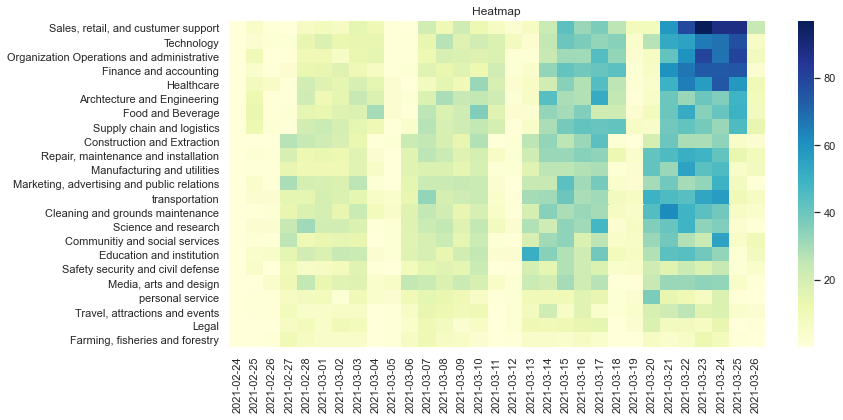

In [32]:
# Plotting heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_heat, cmap="YlGnBu")
ax.set_title('Heatmap')
plt.show()

The heatmap reveals that category 'Sales, retail, and customer support' leads the rank, followed by 'Technology', 'Organization Operations and administrative',           'Finance and accounting', and 'Healthcare' areas. We can see season periods across all categories. We can also infer that most categories have shown an increase in demand.

### Plotting data distribution and boxplots
Plotting the data distribution and the boxplots of variables are essential steps in the data analysis process.

In [33]:
# Showing the top-10 demanded categories
job_cat  = pd.DataFrame(df['category'].value_counts())
demanded_list = job_cat.index[:10].tolist()
demanded_list

['Sales, retail, and custumer support',
 'Technology',
 'Finance and accounting',
 'transportation',
 'Healthcare',
 'Organization Operations and administrative',
 'Supply chain and logistics',
 'Archtecture and Engineering',
 'Repair, maintenance and installation',
 'Food and Beverage']

In [34]:
# Function to return the dataset in format possible to plot in one graph 
# the distribution of many variables
def df_by_category(list_demand):
    dataframe_temp = []
    for category in list_demand:
        df_temporary = df_pub_day[['date', category]]
        df_temporary.rename(columns={category:'pub_count'}, inplace=True)
        df_temporary['category'] = category
        dataframe_temp.append(df_temporary)
        
    df_end = pd.concat(dataframe_temp)
    df_end.reset_index(inplace=True)
    return df_end

# Showing the dataset with the top-10 demanded areas
df_categ = df_by_category(demanded_list[:10])
df_categ[28:33]

,index,date,pub_count,category
28,28,2021-03-24,88,"Sales, retail, and custumer support"
29,29,2021-03-25,88,"Sales, retail, and custumer support"
30,30,2021-03-26,24,"Sales, retail, and custumer support"
31,0,2021-02-24,0,Technology
32,1,2021-02-25,3,Technology


The plotting below only provides the normal distribution for the highest demanded categories.

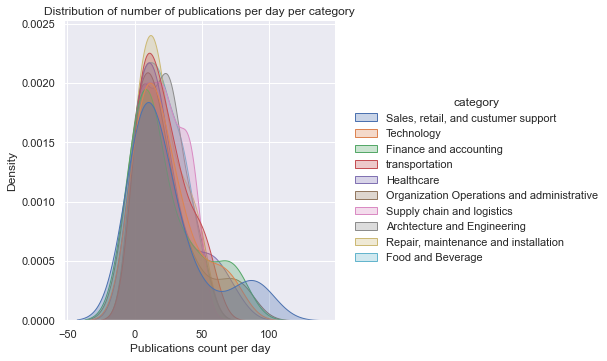

In [35]:
# Plotting distribution
sns.displot(df_categ, x="pub_count", hue="category", kind="kde", fill=True, alpha=0.3)
plt.title('Distribution of number of publications per day per category')
plt.xlabel('Publications count per day')
plt.show()

The plotting below only provides the boxplot for the highest demanded categories.

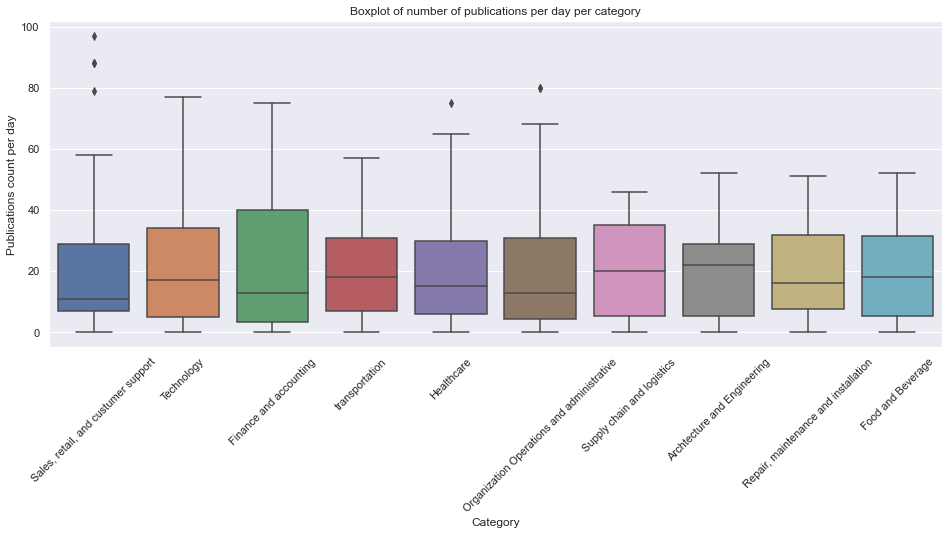

In [36]:
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.boxplot(x='category', y='pub_count', data=df_categ)
plt.title('Boxplot of number of publications per day per category')
plt.ylabel('Publications count per day')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

### Plotting data by days

The plot below shows how the number of job posts is distributed along the days.

The first plot shows all categories at once. We can see that it is hard to distinguish the most demanded categories from the least ones.

The second plot allows us to identify an upward trend along the weeks in the top demanded categories. It visible an increase in demand week after week.   

In [37]:
# Function for plotting data along the days
def plot_demand(list_demand):
    dataframe_temp = []
    for category in list_demand:
        df_temporary = df_pub_day[['date', category]]
        df_temporary.rename(columns={category:'pub_count'}, inplace=True)
        df_temporary['category'] = category
        dataframe_temp.append(df_temporary)
        
    df_end = pd.concat(dataframe_temp)
    df_end.reset_index(inplace=True)
    del df_end['index']
    
    sns.factorplot(data = df_end, x ="date", y = "pub_count", hue='category', size=4, aspect=3)
    plt.title('Plot of number of publications per day per category')
    plt.ylabel('Publications count per day')
    plt.xlabel('Date')
    plt.xticks(rotation=70)
    plt.show()

In [38]:
# List of categories
columns_list = df_pub_day.columns.tolist()[1:]
columns_list

['Sales, retail, and custumer support',
 'Technology',
 'Organization Operations and administrative',
 'Finance and accounting',
 'Healthcare',
 'Archtecture and Engineering',
 'Food and Beverage',
 'Supply chain and logistics',
 'Construction and Extraction',
 'Repair, maintenance and installation',
 'Manufacturing and utilities',
 'Marketing, advertising and public relations',
 'transportation',
 'Cleaning and grounds maintenance',
 'Science and research',
 'Communitiy and social services',
 'Education and institution',
 'Safety security and civil defense',
 'Media, arts and design',
 'personal service',
 'Travel, attractions and events',
 'Legal',
 'Farming, fisheries and forestry']

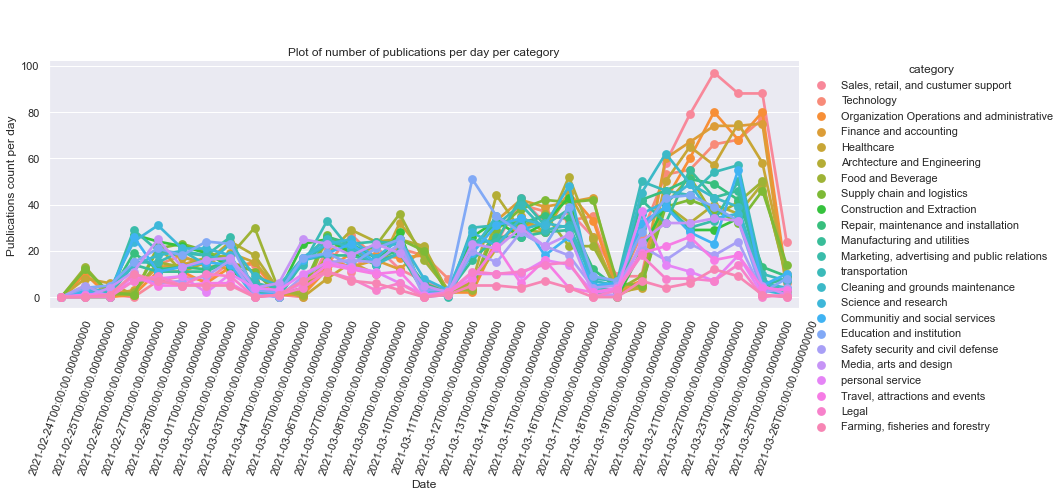

In [39]:
# Plotting all categories
plot_demand(columns_list)

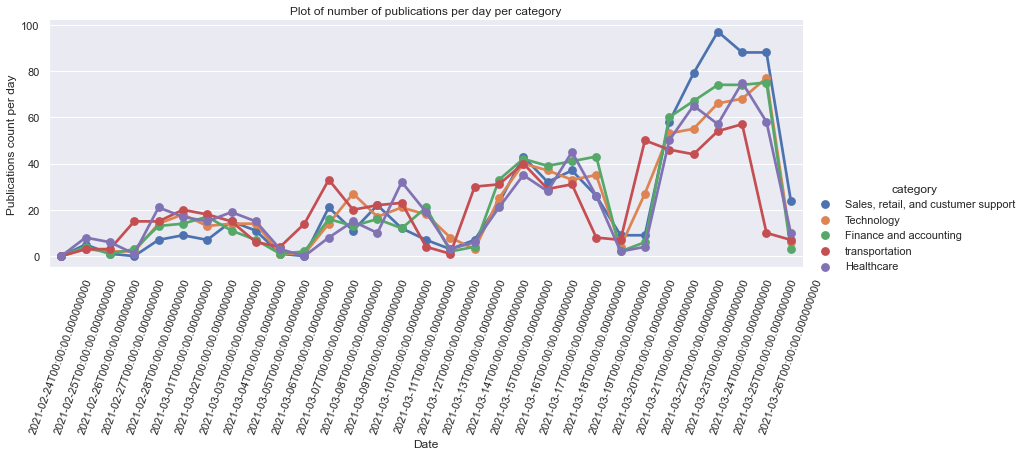

In [40]:
# Plotting only the first top-5 demanded categories
plot_demand(demanded_list[:5])

### Plotting data by weeks

Plotting the job posts by days, we can see sequences of increase and decrease in job posts along the week. It seems that numbers start lower on Mondays, reach a peak in the middle of the week and decrease as weekends get closer.

Thus, plotting the data by weeks might provide a better sense of the data trend.

To do so, the dataset in this section sums up the number of job posts by week. 

The first plot, again, shows all categories at once. The second one shows only the top-5 demanded classes.

In [41]:
categories = ["Sales, retail, and custumer support", 'Technology', 'Organization Operations and administrative',
          'Finance and accounting', 'Healthcare', 'Archtecture and Engineering', 'Food and Beverage',
          'Supply chain and logistics', 'Construction and Extraction', 'Repair, maintenance and installation',
          'Manufacturing and utilities', 'Marketing, advertising and public relations', 'transportation',
          'Cleaning and grounds maintenance', 'Science and research', 'Communitiy and social services', 
          'Education and institution', 'Safety security and civil defense', 'Media, arts and design', 'personal service',
          'Travel, attractions and events', 'Legal', 'Farming, fisheries and forestry']

def df_by_category(list_demand):
    dataframe_temp = []
    for category in list_demand:
        df_temporary = df_pub_day[['date', category]]
        df_temporary.rename(columns={category:'pub_count'}, inplace=True)
        df_temporary['category'] = category
        dataframe_temp.append(df_temporary)
        
    df_end = pd.concat(dataframe_temp)
    df_end.reset_index(inplace=True)
    df_end = df_end.drop('index', 1)
    return df_end

In [42]:
df_for_model = df_by_category(categories)

provinces = df_time['province'].unique().tolist()
df_provinces = pd.DataFrame(columns = provinces)
df_model = pd.concat([df_for_model, df_provinces], axis=0)
df_model.head()

,date,pub_count,category,BC,ON,NS,QC,AB,SK,NU,YT,NL,Canada,NB,MB,NT,PE
0,2021-02-24,0.0,"Sales, retail, and custumer support",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-25,5.0,"Sales, retail, and custumer support",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-26,1.0,"Sales, retail, and custumer support",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-27,0.0,"Sales, retail, and custumer support",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-28,7.0,"Sales, retail, and custumer support",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# We are going to use the 'df_for_model' as a start
df_for_model

,date,pub_count,category
0,2021-02-24,0,"Sales, retail, and custumer support"
1,2021-02-25,5,"Sales, retail, and custumer support"
2,2021-02-26,1,"Sales, retail, and custumer support"
3,2021-02-27,0,"Sales, retail, and custumer support"
4,2021-02-28,7,"Sales, retail, and custumer support"
...,...,...,...
708,2021-03-22,6,"Farming, fisheries and forestry"
709,2021-03-23,12,"Farming, fisheries and forestry"
710,2021-03-24,9,"Farming, fisheries and forestry"
711,2021-03-25,1,"Farming, fisheries and forestry"


In [44]:
# Creating week variables
week_1, week_2 = df_for_model['date'][3:10].values,  df_for_model['date'][10:17].values
week_3, week_4 = df_for_model['date'][17:24].values, df_for_model['date'][24:31].values
weeks = [week_1, week_2, week_3, week_4]
print(week_1, week_4)

['2021-02-27T00:00:00.000000000' '2021-02-28T00:00:00.000000000'
 '2021-03-01T00:00:00.000000000' '2021-03-02T00:00:00.000000000'
 '2021-03-03T00:00:00.000000000' '2021-03-04T00:00:00.000000000'
 '2021-03-05T00:00:00.000000000'] ['2021-03-20T00:00:00.000000000' '2021-03-21T00:00:00.000000000'
 '2021-03-22T00:00:00.000000000' '2021-03-23T00:00:00.000000000'
 '2021-03-24T00:00:00.000000000' '2021-03-25T00:00:00.000000000'
 '2021-03-26T00:00:00.000000000']


In [45]:
# Summing up the values by week for categoy
# Creates a dataset for each category
# Append each dataset in a list
list_df = []
for category in categories:
    df_temp = pd.DataFrame({'week':['week_1', 'week_2', 'week_3', 'week_4'], 'pub_count':'', 'category':[category]*4})
    for i in range(len(weeks)):
        week = weeks[i]
        pub_count = 0
        for j in range(len(week)):
            day = week[j]
            value = 0 
            df = df_for_model[(df_for_model['date']==day) & (df_for_model['category']==category)]
            value = df['pub_count'].values[0]
            pub_count += value

        df_temp['pub_count'][i] = pub_count
    list_df.append(df_temp)   

# Concatenates all datasets into single one
df_model = pd.concat(list_df)
df_model

,week,pub_count,category
0,week_1,50,"Sales, retail, and custumer support"
1,week_2,76,"Sales, retail, and custumer support"
2,week_3,177,"Sales, retail, and custumer support"
3,week_4,443,"Sales, retail, and custumer support"
0,week_1,76,Technology
...,...,...,...
3,week_4,56,Legal
0,week_1,33,"Farming, fisheries and forestry"
1,week_2,35,"Farming, fisheries and forestry"
2,week_3,25,"Farming, fisheries and forestry"


In [46]:
# Function for plotting data along the weeks
def plot_df_model(list_demand):
    dataframe_temp = []
    for category in list_demand:
        df_temporary = df_model[df_model['category']==category]
        dataframe_temp.append(df_temporary)
        
    df_end = pd.concat(dataframe_temp)

    sns.factorplot(data = df_end, x ="week", y = "pub_count", hue='category', size=4, aspect=3)
    plt.title('Plot of number of publications per week per category')
    plt.ylabel('Publications count per week')
    plt.xlabel('Week')
    plt.xlim(0)
    plt.show()

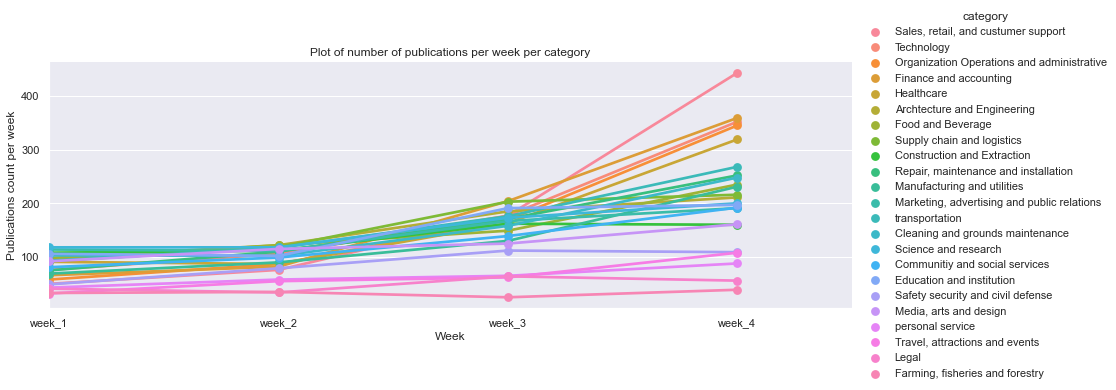

In [47]:
# Plotting data for all categories
plot_df_model(categories)

In [48]:
demanded_list

['Sales, retail, and custumer support',
 'Technology',
 'Finance and accounting',
 'transportation',
 'Healthcare',
 'Organization Operations and administrative',
 'Supply chain and logistics',
 'Archtecture and Engineering',
 'Repair, maintenance and installation',
 'Food and Beverage']

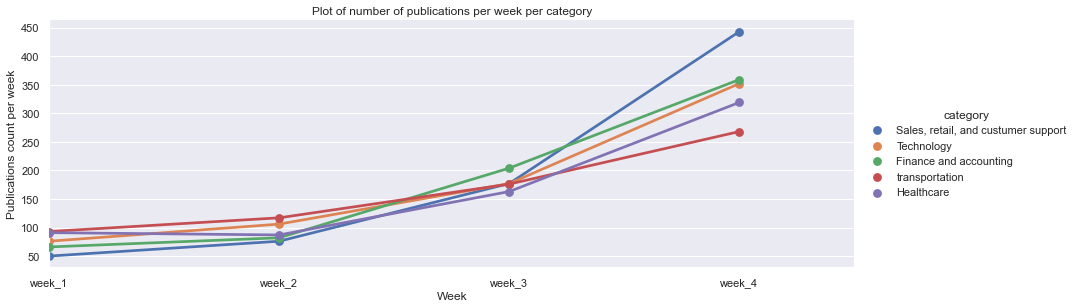

In [49]:
# Plotting data for the top-5 categories
plot_df_model(demanded_list[:5])

From this plot, we can see the upward trend of the top-5 categories demonstrating that their demands increase every week.

# 3. Modeling and forecasting

As we are dealing with a time series dataset that may contain seasonality (non-stationary), to make predictions, we will use ARIMA (Autoregressive Integrated Moving Average) from the Statsmodel library.

In this part of the section, for the 'Sales, retail, and customer support' category, we will:
- train the model and predict values within the period data is available.
- forecast job demand for the next 60 days.

### Finding the parameters for the model

ARIMA depends on the values p, d, q which are described as follows:
- p: number of lags, AR terms
- d: order of differencing
- q: number of lagged forecast errors, MA terms

In [50]:
# Importing required libraries
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

To check if the data is stationary or not(seasonality) we will get 'p' value using 'adfuller' module.

If p-value is greater than the significance level 0.05, the time series is not stationary and differencing will be needed.

In [51]:
# Assingning the time series to 'series' variable 
test = df_pub_day.iloc[:,[0,1]]
test.set_index('date', inplace=True)
series = test['Sales, retail, and custumer support']

# Printing the p value
print("p-value:", adfuller(series.dropna())[1])

p-value: 1.0


From the result above, we need to differentiate the time series. In the plots below, we will see that the value of 'd' will be 1. The gray region is the significance level area. The rule to find the value of d is all lags, but one should be under the significance level. We found that right in the 1st order differencing.

That means that the time series is stationary at d = 1.

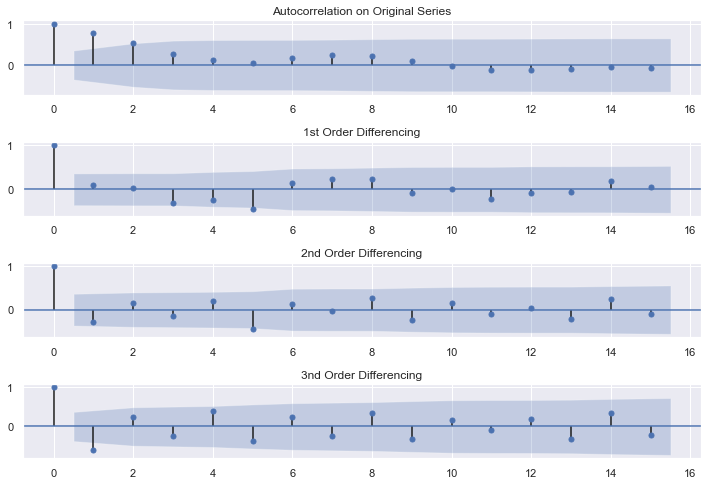

In [52]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(611)
fig = plot_acf(series, ax=ax1, title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(612)
fig = plot_acf(series.diff().dropna(), ax=ax2, title="1st Order Differencing")
ax3 = fig.add_subplot(613)
fig = plot_acf(series.diff().diff().dropna(), ax=ax3, title="2nd Order Differencing")
ax4 = fig.add_subplot(614)
fig = plot_acf(series.diff().diff().diff().dropna(), ax=ax4, title="3nd Order Differencing")
plt.tight_layout()
plt.show()

Value for p is the amount of lags bigger than the significance level in partial autocorrelation function.

From the plot below, we can see that p = 4. 

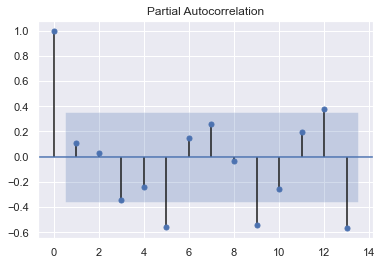

In [53]:
plot_pacf(series.diff().dropna(), lags=13) #knowing d=1 we apply diff() once
plt.show()

Finally, we can determine the q value by plotting Autocorrelation function. Again, we will count the number of lags that is significantly higher than the confidence level.

From the plot, we can see that q = 1.

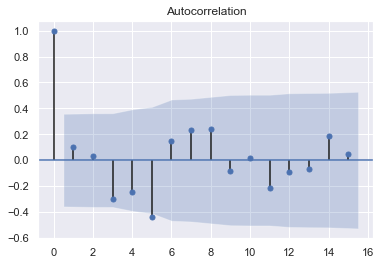

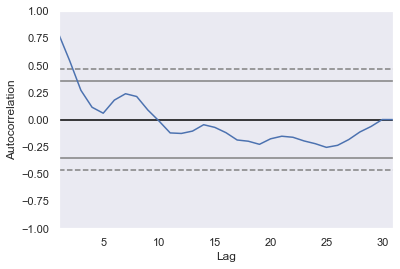

In [54]:
plot_acf(series.diff().dropna())
plt.show()

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

### Forecasting the top category: "Sales, retail and customer support"
The code below:
 - Splits the data in the proportion 70/30.
 - trains ARIMA model.
 - predicts the values.
 - prints out the predicted and expected values and the RMSE accuracy. 
 - plots a graph where red line is the predicted and the blue one is the expected value.

In [55]:
df_pub_day.iloc[:,[0,1]]

,date,"Sales, retail, and custumer support"
0,2021-02-24,0
1,2021-02-25,5
2,2021-02-26,1
3,2021-02-27,0
4,2021-02-28,7
5,2021-03-01,9
6,2021-03-02,7
7,2021-03-03,15
8,2021-03-04,11
9,2021-03-05,1


predicted=22.289636, expected=37.000000
predicted=27.463189, expected=26.000000
predicted=26.200884, expected=9.000000
predicted=16.746979, expected=9.000000
predicted=10.172625, expected=58.000000
predicted=58.306246, expected=79.000000
predicted=66.673545, expected=97.000000
predicted=79.298176, expected=88.000000
predicted=66.616642, expected=88.000000
predicted=81.415237, expected=24.000000
Test RMSE: 28.354


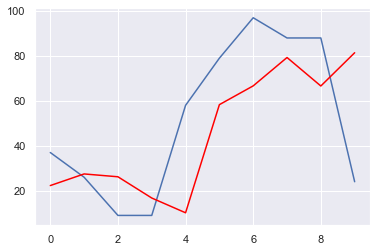

In [56]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
test = df_pub_day.iloc[:,[0,1]]
test.set_index('date', inplace=True)
series = test['Sales, retail, and custumer support']
series.index = series.index.to_period('D')

# split into train and test sets
X = series.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

This part of the section prints out the forecasting for next 60 days (value 90).

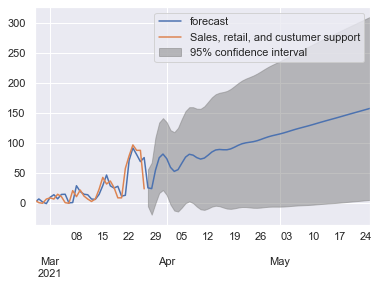

                                       ARIMA Model Results                                       
Dep. Variable:     D.Sales, retail, and custumer support   No. Observations:                   30
Model:                                    ARIMA(4, 1, 0)   Log Likelihood                -125.598
Method:                                          css-mle   S.D. of innovations             15.624
Date:                                   Sat, 10 Apr 2021   AIC                            263.196
Time:                                           18:56:30   BIC                            271.604
Sample:                                       02-25-2021   HQIC                           265.886
                                            - 03-26-2021                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [74]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame as df
sns.set()

# load dataset
test = df_pub_day.iloc[:,[0,1]]
test.set_index('date', inplace=True)
series = test['Sales, retail, and custumer support']
series.index = series.index.to_period('D')

warnings.filterwarnings("ignore")
model = ARIMA(series, order=(4, 1, 0))
results = model.fit()
results.summary()
graph = results.plot_predict(1, 90)
plt.show()

print(results.summary())

### Forecasting Data, AI and Machine Learning Jobs

In [58]:
jobs = { 'Tech Jobs':["Data","Intelligence","Machine"]}
        
# Creating a dataset with dates as index
minimum = df_time['date'].min()
maximum = df_time['date'].max()
df_dates = pd.DataFrame(pd.date_range(start=minimum, end=maximum), columns=['date'])


df_pub_count = []

dictionary = dict()

# looping over all jobs
for job in jobs:
    date_list = []
        
    seperator = '|'
    search_pattern = seperator.join(jobs[job])
    print(search_pattern)
    
    # Filtering by category and by date below 30 days 
    df_temp = df_time[(df_time['job_title'].str.contains(search_pattern)) & (df_time['days_elapsed']<30)]
    df_temp = pd.DataFrame(df_temp['date'].value_counts()) # count the number of publications
    df_temp.reset_index(inplace=True)
    df_temp.rename(columns={'index':'date', 'date':'pub_count'}, inplace=True)
    df_temp.sort_values(by='date', inplace=True)
    
    # Looping over dates
    for date in df_dates['date']:
#         Filter the dataframe by date
        df_temp_ = df_temp[df_temp['date']==date]
        if len(df_temp_)==1:
            date_list.append(df_temp_['pub_count'].iloc[0])
        else:
            date_list.append(0)
    dictionary[job] = date_list

Data|Intelligence|Machine


In [59]:
# Job-wise dataset
df_pub_day_job = pd.concat([df_dates, pd.DataFrame(dictionary)], axis=1)
df_pub_day_job.sum()

Tech Jobs    204
dtype: int64

In [60]:
# Assingning the time series to 'series' variable 
test = df_pub_day_job.iloc[:,[0,1]]
test.set_index('date', inplace=True)
series = test['Tech Jobs']
series.index = series.index.to_period('D')

# Printing the p value
print("p-value:", adfuller(series.dropna())[1])

p-value: 0.989175414511993


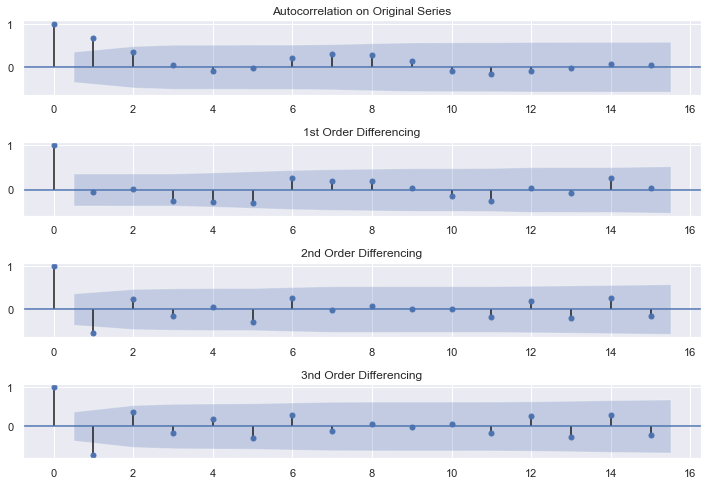

In [61]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(611)
fig = plot_acf(series, ax=ax1, title="Autocorrelation on Original Series") 
ax2 = fig.add_subplot(612)
fig = plot_acf(series.diff().dropna(), ax=ax2, title="1st Order Differencing")
ax3 = fig.add_subplot(613)
fig = plot_acf(series.diff().diff().dropna(), ax=ax3, title="2nd Order Differencing")
ax4 = fig.add_subplot(614)
fig = plot_acf(series.diff().diff().diff().dropna(), ax=ax4, title="3nd Order Differencing")
plt.tight_layout()
plt.show()

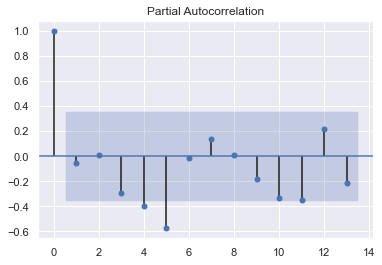

In [62]:
plot_pacf(series.diff().dropna(), lags=13) #knowing d=1 we apply diff() once
plt.show()

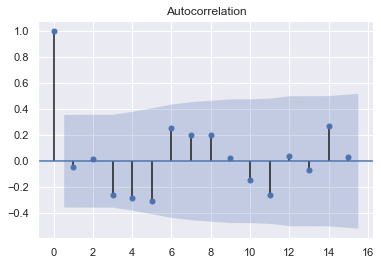

In [63]:
plot_acf(series.diff().dropna())
plt.show()

predicted=12.614891, expected=8.000000
predicted=9.560521, expected=5.000000
predicted=6.262075, expected=4.000000
predicted=4.398165, expected=4.000000
predicted=4.052349, expected=10.000000
predicted=8.609395, expected=19.000000
predicted=18.324283, expected=17.000000
predicted=16.687222, expected=21.000000
predicted=20.567639, expected=12.000000
predicted=13.687945, expected=6.000000
Test RMSE: 5.862


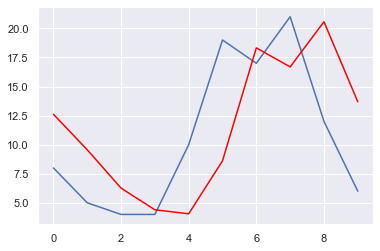

In [64]:
# p=2,q=1,d=1
# evaluate an ARIMA model using a walk-forward validation
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
test = df_pub_day_job.iloc[:,[0,1]]
test.set_index('date', inplace=True)
series = test['Tech Jobs']
series.index = series.index.to_period('D')

# split into train and test sets
X = series.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

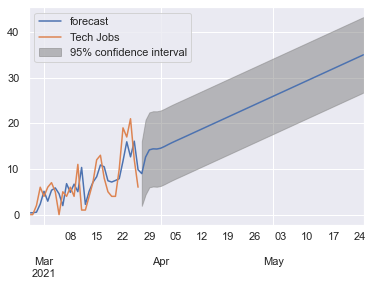

In [65]:
# forecasting ahead in time
from statsmodels.tsa.arima_model import ARIMA
sns.set()

model = ARIMA(series, order=(2, 1, 1))
results = model.fit()
results.summary()
graph = results.plot_predict(1, 90)
plt.show()

Code for finding jobs related to Particular keyword

In [66]:
job_name=np.array(df_time['job_title'].unique())

In [67]:
job_name = job_name.tolist()
# job_name

In [68]:
sub='engineer'
# print("\n".join(s for s in job_name if sub.lower() in s.lower()))

### Forecasting Top 10 job categories

#### 1. Getting the arima model values: p, q, d through ACF and PACF plots

In [69]:
# Importing required libraries
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [70]:
"Sales, retail, and custumer support","Technology","Organization Operations and administrative",
"Finance and accounting","Healthcare","Archtecture and Engineering",
"Food and Beverage","Supply chain and logistics","Construction and Extraction",
"Repair, maintenance and installation"

'Repair, maintenance and installation'


===========   Sales, retail, and custumer support  ==============

p-value: 1.0


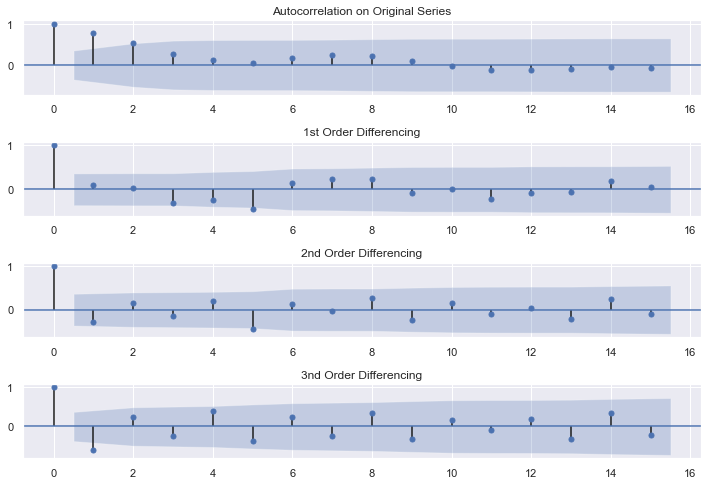

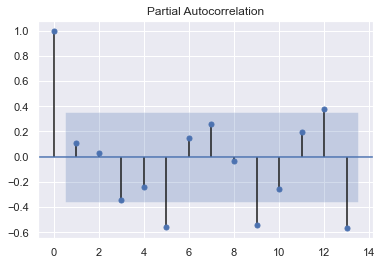

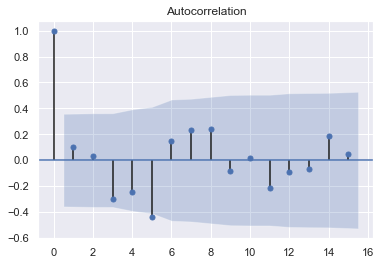


===========   Technology  ==============

p-value: 1.0


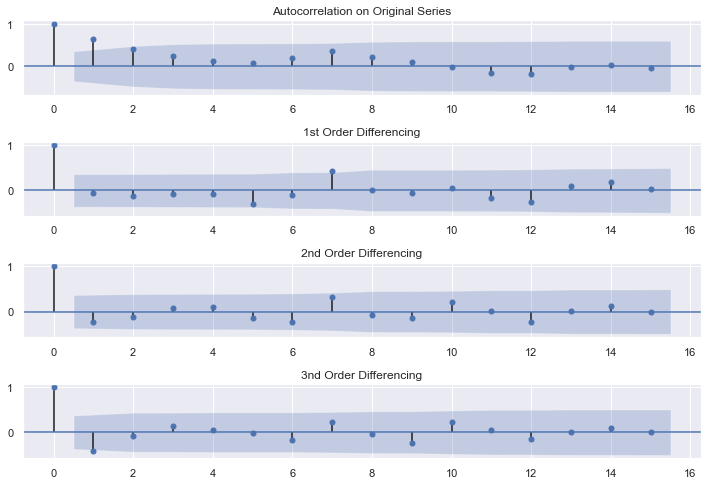

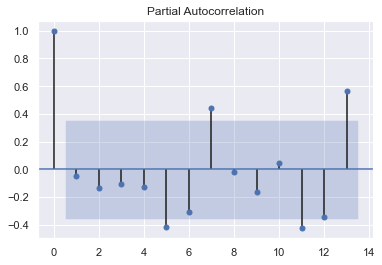

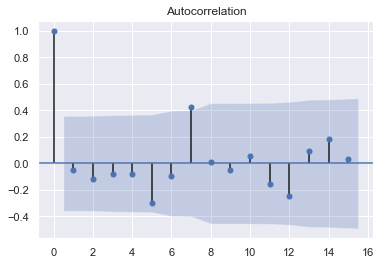


===========   Organization Operations and administrative  ==============

p-value: 1.0


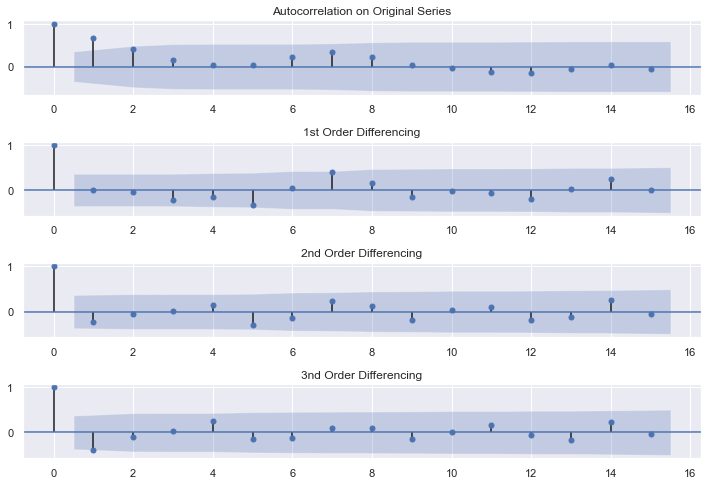

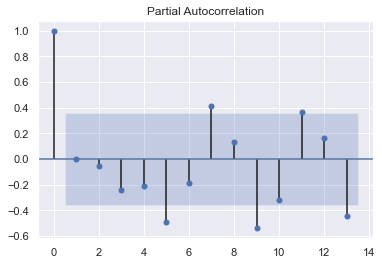

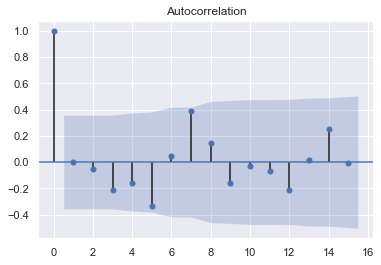


===========   Finance and accounting  ==============

p-value: 0.9975905770498719


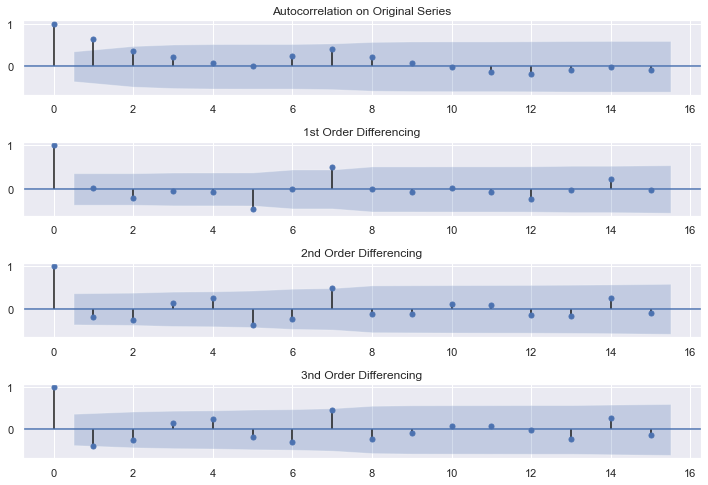

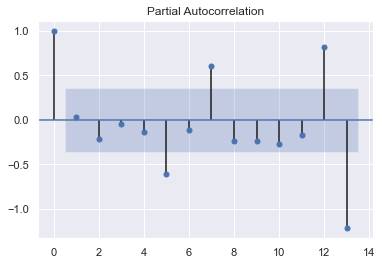

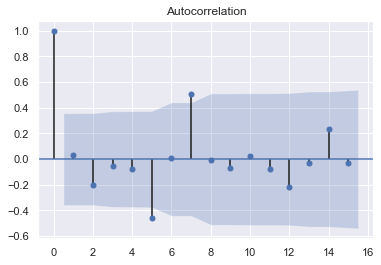


===========   Healthcare  ==============

p-value: 0.9971909493650135


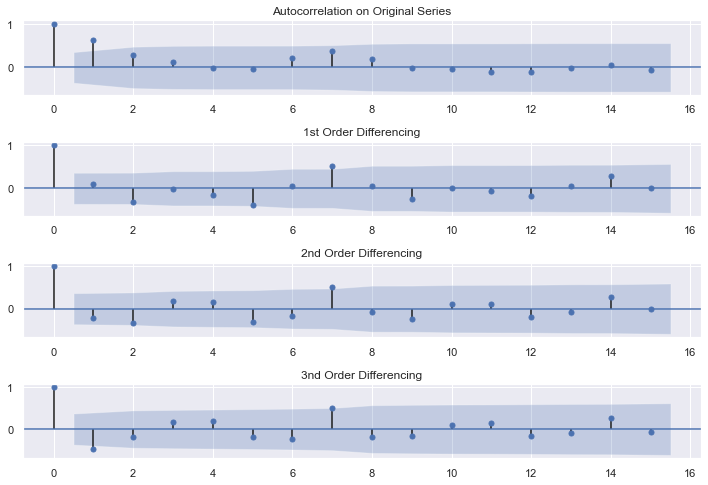

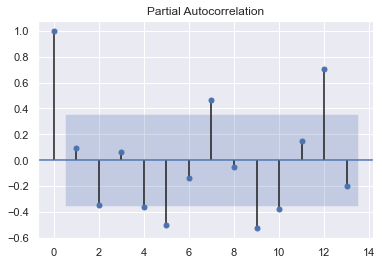

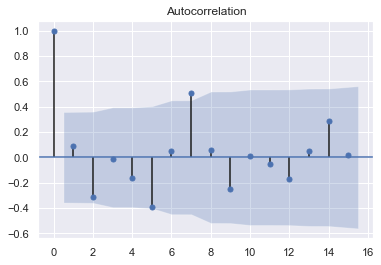


===========   Archtecture and Engineering  ==============

p-value: 0.8490009608547717


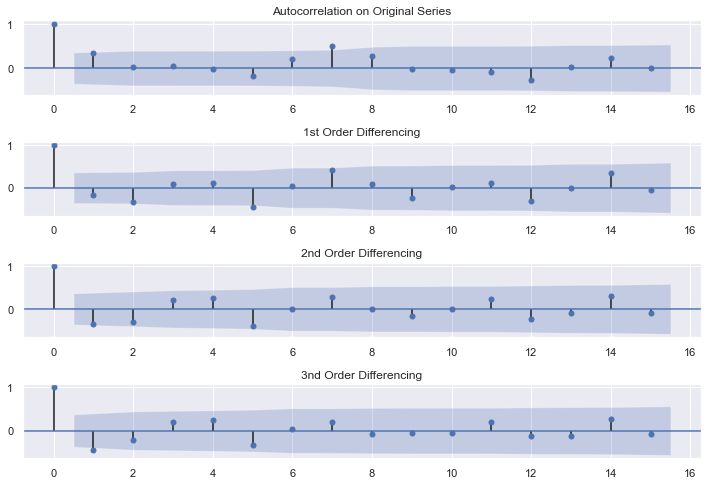

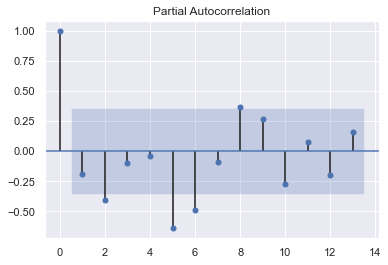

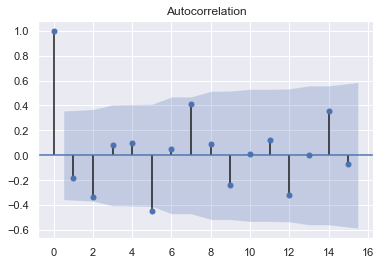


===========   Food and Beverage  ==============

p-value: 0.9884598899033927


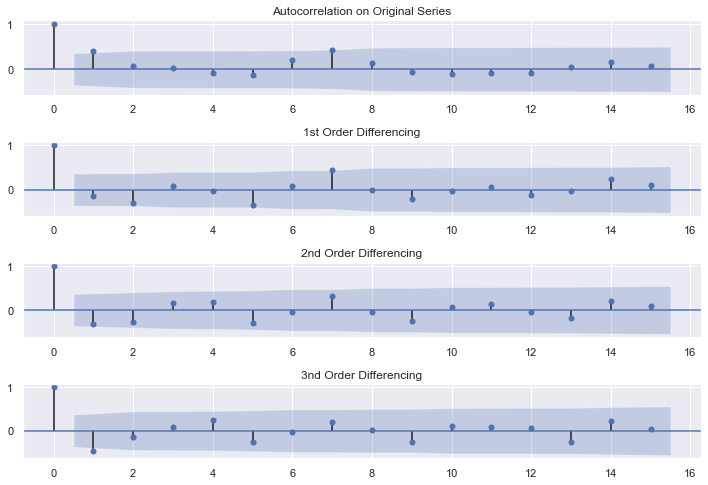

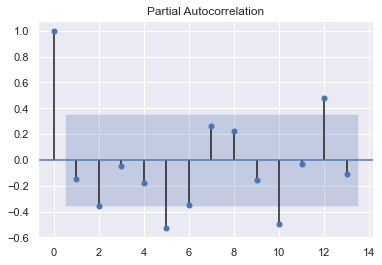

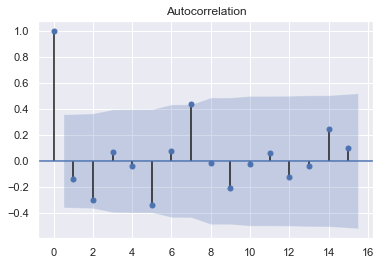


===========   Supply chain and logistics  ==============

p-value: 0.9313606567499044


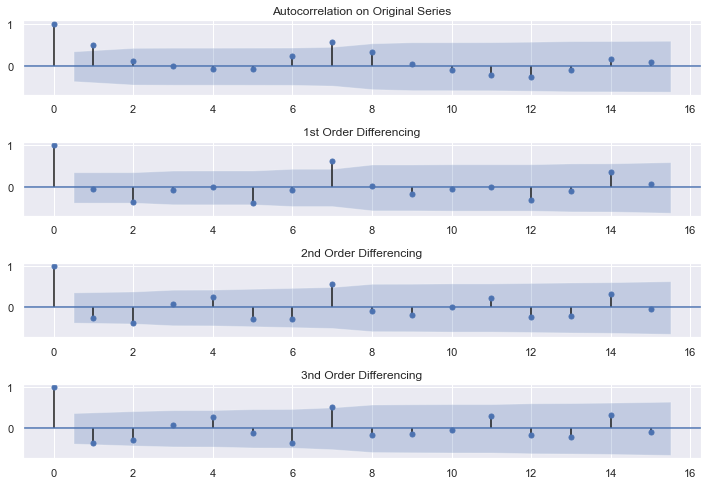

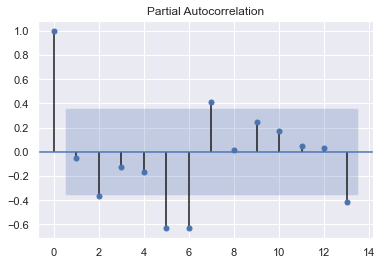

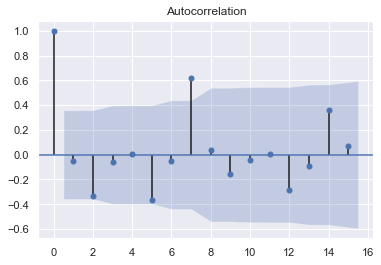


===========   Construction and Extraction  ==============

p-value: 0.8097992065028004


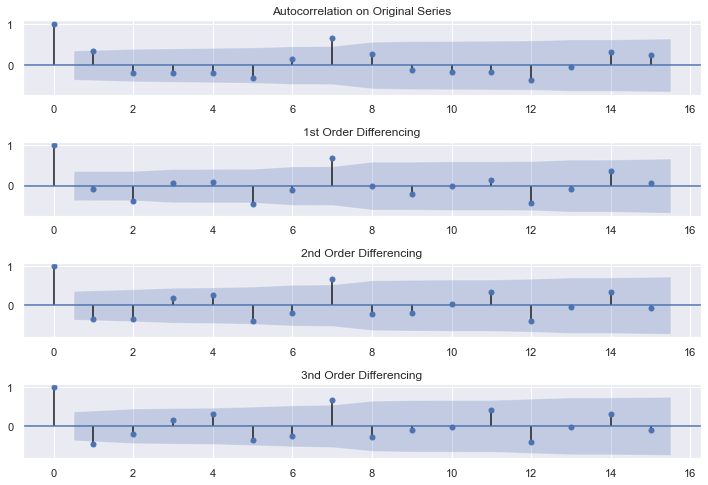

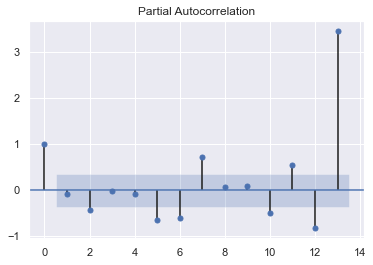

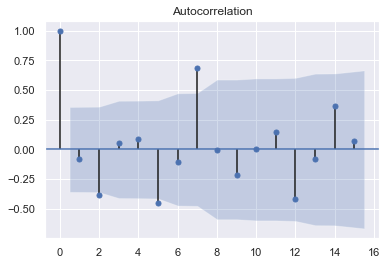


===========   Repair, maintenance and installation  ==============

p-value: 0.9970279333616651


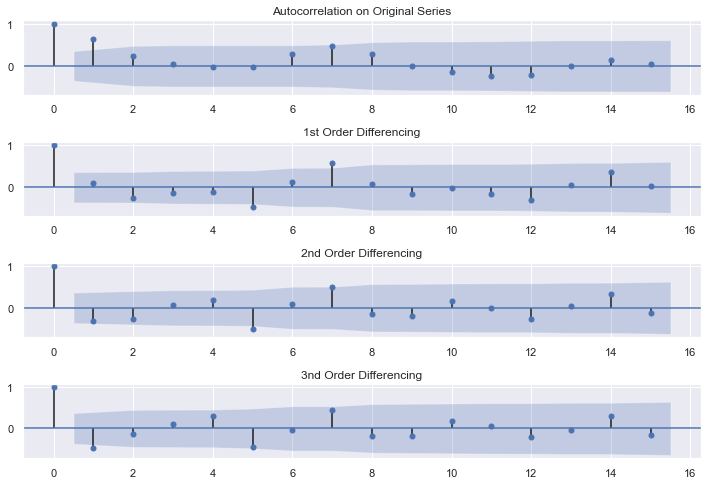

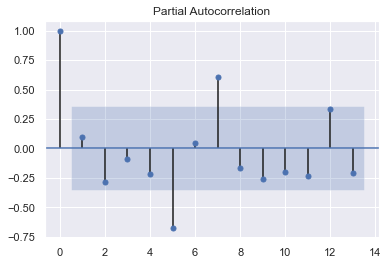

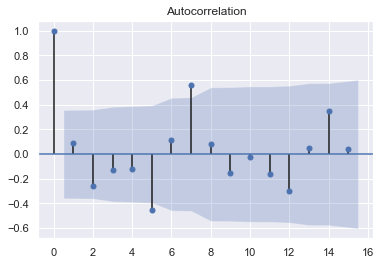

In [71]:
# Getting the arima model values (pqd for all 10 job categories)
test_cat = df_pub_day.iloc[:,:11]
test_cat.set_index('date', inplace=True)
    
for i in test_cat:
    print(f"\n===========   {i}  ==============\n")
    series = test_cat[i]
    series.index = series.index.to_period('D')
    
    p_value = adfuller(series.dropna())[1]
    # Printing the p value
    print("p-value:", p_value)
    
    #d value
    if p_value>0.05:
        fig = plt.figure(figsize=(10,10))
        ax1 = fig.add_subplot(611)
        fig = plot_acf(series, ax=ax1, title="Autocorrelation on Original Series")
        ax2 = fig.add_subplot(612)
        fig = plot_acf(series.diff().dropna(), ax=ax2, title="1st Order Differencing")
        ax3 = fig.add_subplot(613)
        fig = plot_acf(series.diff().diff().dropna(), ax=ax3, title="2nd Order Differencing")
        ax4 = fig.add_subplot(614)
        fig = plot_acf(series.diff().diff().diff().dropna(), ax=ax4, title="3nd Order Differencing")
        plt.tight_layout()
        plt.show()
        
        #p
        plot_pacf(series.diff().dropna(), lags=13) #knowing d=1 we apply diff() once
        plt.show()
        
        #q
        plot_acf(series.diff().dropna())
        plt.show()

#### 2. Plotting the forecast

predicted=33.585653, expected=45.000000
predicted=44.470676, expected=33.000000
predicted=9.661879, expected=3.000000
predicted=7.131576, expected=7.000000
predicted=22.224307, expected=42.000000
predicted=49.168960, expected=60.000000
predicted=52.446156, expected=80.000000
predicted=94.170508, expected=68.000000
predicted=21.498243, expected=80.000000
predicted=88.178450, expected=8.000000
Test RMSE: 34.799


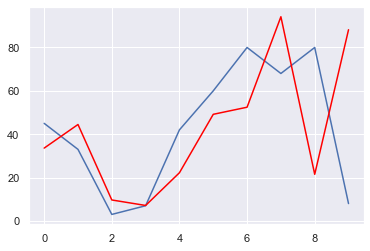

In [72]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
test = df_pub_day.iloc[:,[0,3]]
test.set_index('date', inplace=True)
series = test['Organization Operations and administrative']
series.index = series.index.to_period('D')

# split into train and test sets
X = series.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

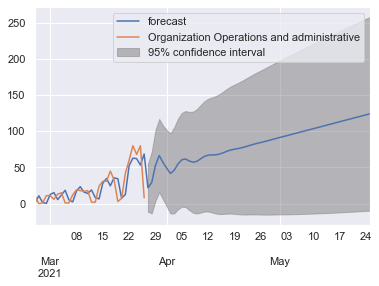

In [73]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame as df
sns.set()

# load dataset
test = df_pub_day.iloc[:,[0,3]]
test.set_index('date', inplace=True)
series = test['Organization Operations and administrative']
series.index = series.index.to_period('D')

warnings.filterwarnings("ignore")
model = ARIMA(series, order=(4, 1, 0))
results = model.fit()
results.summary()
graph = results.plot_predict(1, 90)
plt.show()

# References

- https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html

- https://machinelearningmastery.com/?s=time+series+forecasting&post_type=post&submit=Search

- https://towardsdatascience.com/arima-forecasting-in-python-90d36c2246d3